# Assignment 1 - Predictive Modeling and Deployment

Student: Lucas Antunes - u3211262 <br>
Unit: 11523 - Data Science Technology and Systems

In [1182]:
# Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
from geopandas.tools import sjoin
from shapely.geometry import Point
from geopandas import GeoDataFrame

## Importing and understanding data

In [1183]:
# Loading dataset
df = pd.read_csv('zomato_df_final_data.csv')
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

Checking for missing values on the dataset
We'll act on that later on

In [1184]:
df.isna().sum()

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

### In the section below we'll explore the dataset answering a couple of exploratory data analysis questions, such as:

#### a) How many unique cuisines are served by Sydney restaurants

In [1185]:
# Firstly dealing with strings characters and removing them transforming into a list
all_cuisines = list()
for cuisine in df['cuisine']:
    clean_cuisine = cuisine.replace('[', '').replace(']', '').replace('\'', '').split(',')
    all_cuisines += clean_cuisine
all_cuisines

['Hot Pot',
 ' Korean BBQ',
 ' BBQ',
 ' Korean',
 'Cafe',
 ' Coffee and Tea',
 ' Salad',
 ' Poké',
 'Japanese',
 'Modern Australian',
 'Thai',
 ' Salad',
 'Desserts',
 ' Modern Australian',
 'Cantonese',
 ' Chinese',
 ' Yum Cha',
 'Japanese',
 'Japanese',
 ' Sushi',
 'Japanese',
 ' Ramen',
 'Modern Australian',
 'Thai',
 ' Salad',
 'Malaysian',
 'Chinese',
 ' Taiwanese',
 ' Yum Cha',
 'Seafood',
 ' Modern Australian',
 'Cafe',
 'Cafe',
 ' Desserts',
 'Japanese',
 ' Asian',
 'Cafe',
 'Italian',
 ' Japanese',
 'Steak',
 ' Modern Australian',
 ' Salad',
 'French',
 'Chinese',
 'Singaporean',
 ' Malaysian',
 'Seafood',
 ' Steak',
 ' Modern Australian',
 ' Poké',
 'French',
 ' European',
 'Cafe',
 ' Coffee and Tea',
 'Mexican',
 ' Bar Food',
 'American',
 ' Burger',
 'Japanese',
 ' Sushi',
 'Lebanese',
 'Cafe',
 ' Bakery',
 ' Desserts',
 'Cafe',
 ' Modern Australian',
 'American',
 'Burger',
 ' Modern Australian',
 'Grill',
 ' Cafe',
 ' Desserts',
 ' Pizza',
 'Asian',
 ' Vietnamese',
 ' Sal

In [1186]:
# Trimming the whitespaces
cuisines_clean_list = list()
for cuisine in all_cuisines:
    cuisines_clean_list.append(cuisine.strip())
cuisines_clean_list

['Hot Pot',
 'Korean BBQ',
 'BBQ',
 'Korean',
 'Cafe',
 'Coffee and Tea',
 'Salad',
 'Poké',
 'Japanese',
 'Modern Australian',
 'Thai',
 'Salad',
 'Desserts',
 'Modern Australian',
 'Cantonese',
 'Chinese',
 'Yum Cha',
 'Japanese',
 'Japanese',
 'Sushi',
 'Japanese',
 'Ramen',
 'Modern Australian',
 'Thai',
 'Salad',
 'Malaysian',
 'Chinese',
 'Taiwanese',
 'Yum Cha',
 'Seafood',
 'Modern Australian',
 'Cafe',
 'Cafe',
 'Desserts',
 'Japanese',
 'Asian',
 'Cafe',
 'Italian',
 'Japanese',
 'Steak',
 'Modern Australian',
 'Salad',
 'French',
 'Chinese',
 'Singaporean',
 'Malaysian',
 'Seafood',
 'Steak',
 'Modern Australian',
 'Poké',
 'French',
 'European',
 'Cafe',
 'Coffee and Tea',
 'Mexican',
 'Bar Food',
 'American',
 'Burger',
 'Japanese',
 'Sushi',
 'Lebanese',
 'Cafe',
 'Bakery',
 'Desserts',
 'Cafe',
 'Modern Australian',
 'American',
 'Burger',
 'Modern Australian',
 'Grill',
 'Cafe',
 'Desserts',
 'Pizza',
 'Asian',
 'Vietnamese',
 'Salad',
 'Modern Australian',
 'Bar Food',

In [1187]:
# Removing duplicates
unique_cuisines = list(set(cuisines_clean_list))
len(unique_cuisines)

134

In [1188]:
unique_cuisines

['Cambodian',
 'Burmese',
 'Salad',
 'Portuguese',
 'Indian',
 'Modern European',
 'Fusion',
 'Japanese',
 'Israeli',
 'Pizza',
 'Crepes',
 'Burger',
 'Tex-Mex',
 'International',
 'Greek',
 'Modern Australian',
 'Sandwich',
 'BBQ',
 'Drinks Only',
 'Spanish',
 'Vegan',
 'Indonesian',
 'Sushi',
 'Nepalese',
 'Beverages',
 'Soul Food',
 'South African',
 'Fish and Chips',
 'Korean BBQ',
 'Pastry',
 'Pakistani',
 'Chinese',
 'Czech',
 'Cafe',
 'Sichuan',
 'Asian',
 'Russian',
 'Vegetarian',
 'Tea',
 'Japanese BBQ',
 'Iranian',
 'Deli',
 'Singaporean',
 'Filipino',
 'Italian',
 'Australian',
 'Yum Cha',
 'Sri Lankan',
 'Satay',
 'Bakery',
 'Afghani',
 'Belgian',
 'Steak',
 'Thai',
 'Tibetan',
 'Malaysian',
 'Colombian',
 'Ukrainian',
 'Kiwi',
 'Continental',
 'Dutch',
 'Dumplings',
 'Falafel',
 'American',
 'Contemporary',
 'Mongolian',
 'Egyptian',
 'Latin American',
 'Ramen',
 'Ice Cream',
 'Teriyaki',
 'Grill',
 'Ethiopian',
 'Taiwanese',
 'European',
 'Charcoal Chicken',
 'Bangladeshi

There are 134 unique cuisines served by Sydney restaurants

#### b) Which suburbs (top 3) have the highest number of restaurants

In [1189]:
# Top 3 suburbs with higher number of restaurants
df['subzone'].value_counts()[0:3]

CBD            476
Surry Hills    260
Parramatta     225
Name: subzone, dtype: int64

In [1190]:
# Top 10 suburbs in a dataframe
subzones = pd.DataFrame(df['subzone'].value_counts()[0:10])
subzones['suburbs'] = subzones.index
subzones['count'] = subzones['subzone']
subzones = subzones.reset_index(drop=True)
subzones = subzones.drop('subzone', 1)
subzones

/Users/lucas/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


suburbs  count
0           CBD    476
1   Surry Hills    260
2    Parramatta    225
3  Darlinghurst    188
4     Chinatown    174
5       Newtown    160
6     Blacktown    123
7   Potts Point    120
8         Manly    117
9   Bondi Beach    113

In [1191]:
# Plotting top 10
subzones = subzones.sort_values(by=['count'])
plt.barh(subzones['suburbs'], subzones['count'])
plt.show()

The top 3 suburbs with highest numbers of restaurants are: CBD, Surry Hills and Parramatta.

#### c) Explore the statement: "Restaurants with 'excelent' rating are mostly very expensive while those with 'poor' rating are rarely expensive

In [1192]:
# Visualizing cost distribution by rating
g = sns.FacetGrid(df, col='rating_text', col_wrap=3, height=5, col_order=['Excellent', 'Very Good', 'Good', 'Average', 'Poor'])
g.map_dataframe(sns.histplot, x='cost')

It's noticeable from its distribution that all of them have a skewed distribution (to the right), therefore, I'll group them by rating and compute its median, instead of mean.

In [1193]:
# Grouping restaurants by rating and calculating its median cost
rating_price = pd.DataFrame(df.groupby('rating_text')['cost'].median())
rating_price

cost
rating_text      
Average      45.0
Excellent    60.0
Good         50.0
Poor         50.0
Very Good    60.0

We can notice from each of the ratings by cost distribution, plus from its median cost by rating, that excellent restaurants doesn't always lead to high cost. The same reasoning applies to the poor ones.

### Performing some EDA over a couple of variables

<AxesSubplot:xlabel='cost', ylabel='Count'>

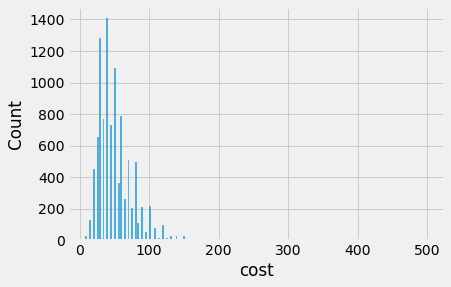

In [1194]:
# It was performed analysis before on cost distribution by rating. Let's now observe cost distribution in general.
sns.histplot(data=df, x='cost')

Cost as previously mentioned, has a right-skewed distribution.

<AxesSubplot:xlabel='rating_number', ylabel='Count'>

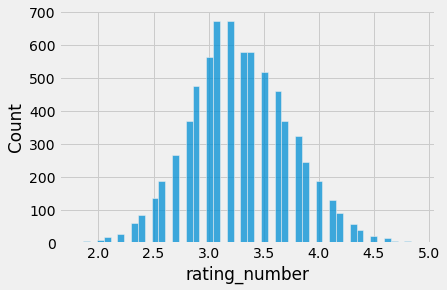

In [1195]:
# Analysing rating histogram distribution 
sns.histplot(data=df, x='rating_number')

The rating score distribution looks pretty symetric.

<AxesSubplot:xlabel='rating_text', ylabel='votes'>

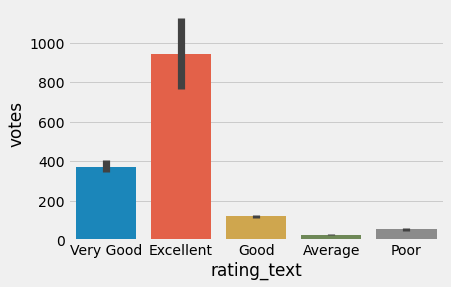

In [1196]:
# Bar chart from total number of votes per rating
sns.barplot(data=df, x='rating_text', y='votes')

There seems to be a trend between the number of votes (reviews) and the restaurant's rating. The better the rating, the more reviews it tend to have. It could also be because it could have a higher absolute number of visits.

In [1197]:
# Exploring the type of the restaurant
types_list = list()
for tp in df['type']:
    if(pd.isna(tp) == False):
        clean_type = tp.replace('[', '').replace(']', '').replace('\'', '').split(',')
        types_list += clean_type
types_list

['Casual Dining',
 'Café',
 'Fine Dining',
 'Fine Dining',
 ' Bar',
 'Casual Dining',
 'Casual Dining',
 ' Dessert Parlour',
 'Casual Dining',
 'Casual Dining',
 'Fine Dining',
 ' Wine Bar',
 'Casual Dining',
 'Fine Dining',
 'Casual Dining',
 'Casual Dining',
 'Casual Dining',
 'Fine Dining',
 'Café',
 'Café',
 'Casual Dining',
 'Café',
 'Fine Dining',
 'Casual Dining',
 'Casual Dining',
 ' Wine Bar',
 'Casual Dining',
 'Casual Dining',
 'Fine Dining',
 'Casual Dining',
 ' Bar',
 'Café',
 'Casual Dining',
 ' Bar',
 'Casual Dining',
 ' Bar',
 'Casual Dining',
 'Fast Food',
 'Café',
 ' Bakery',
 'Café',
 'Casual Dining',
 'Casual Dining',
 ' Bar',
 'Casual Dining',
 ' Café',
 'Casual Dining',
 'Fine Dining',
 'Bar',
 'Fine Dining',
 'Fine Dining',
 ' Wine Bar',
 'Casual Dining',
 'Casual Dining',
 ' Bar',
 'Casual Dining',
 'Casual Dining',
 'Casual Dining',
 'Casual Dining',
 ' Café',
 'Casual Dining',
 'Bakery',
 ' Dessert Parlour',
 'Café',
 'Café',
 'Café',
 'Bar',
 ' Wine Bar',
 'F

In [1198]:
# Trimming the whitespaces
types_clean = list()
for typ in types_list:
    types_clean.append(typ.strip())
types_clean

['Casual Dining',
 'Café',
 'Fine Dining',
 'Fine Dining',
 'Bar',
 'Casual Dining',
 'Casual Dining',
 'Dessert Parlour',
 'Casual Dining',
 'Casual Dining',
 'Fine Dining',
 'Wine Bar',
 'Casual Dining',
 'Fine Dining',
 'Casual Dining',
 'Casual Dining',
 'Casual Dining',
 'Fine Dining',
 'Café',
 'Café',
 'Casual Dining',
 'Café',
 'Fine Dining',
 'Casual Dining',
 'Casual Dining',
 'Wine Bar',
 'Casual Dining',
 'Casual Dining',
 'Fine Dining',
 'Casual Dining',
 'Bar',
 'Café',
 'Casual Dining',
 'Bar',
 'Casual Dining',
 'Bar',
 'Casual Dining',
 'Fast Food',
 'Café',
 'Bakery',
 'Café',
 'Casual Dining',
 'Casual Dining',
 'Bar',
 'Casual Dining',
 'Café',
 'Casual Dining',
 'Fine Dining',
 'Bar',
 'Fine Dining',
 'Fine Dining',
 'Wine Bar',
 'Casual Dining',
 'Casual Dining',
 'Bar',
 'Casual Dining',
 'Casual Dining',
 'Casual Dining',
 'Casual Dining',
 'Café',
 'Casual Dining',
 'Bakery',
 'Dessert Parlour',
 'Café',
 'Café',
 'Café',
 'Bar',
 'Wine Bar',
 'Fine Dining',
 '

In [1199]:
# Removing duplicates
unique_types = list(set(types_clean))
len(unique_types)

14

In [1200]:
type_rest = pd.DataFrame(types_clean).value_counts()
type_rest

Casual Dining      5566
Café               3169
Bar                 692
Fast Food           588
Food Court          543
Pub                 382
Bakery              174
Fine Dining         113
Wine Bar            106
Dessert Parlour      67
Beverage Shop        17
Food Truck           16
Club                 12
Food Stall            2
dtype: int64

[Text(0.5, 0, 'count'), Text(0, 0.5, 'type')]

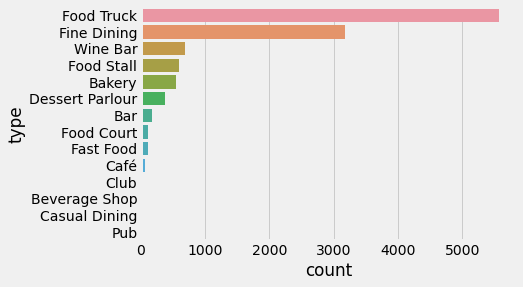

In [1201]:
# Plotting a bar plot showing the types of restaurant in sydney
types = np.asarray(unique_types)
count = np.asarray(type_rest)
bplot = sns.barplot(x=count, y=types)
bplot.set(xlabel='count', ylabel='type')

In [1202]:
# Exploring the rating number when considering if they run groupon discounts
pd.DataFrame(df.groupby('groupon')['rating_number'].mean())

rating_number
groupon               
False         3.283806
True          3.274257

There seems to be no link between a restaurant offering groupon and its rating.

In [1203]:
df['groupon'].value_counts()

False    10378
True       122
Name: groupon, dtype: int64

However, there's a very small sample of restaurants accepting groupon, so that might also play a role.

### Producing a cusine density map

In [1204]:
# Path to geojson file
path_to_data = "sydney.geojson"
gdf = geopandas.read_file(path_to_data)
gdf.head()

SSC_CODE          SSC_NAME CONF_VALUE      SQKM  \
0    10001        Abbotsbury  Very good  4.984673   
1    10002  Abbotsford (NSW)  Very good  1.017855   
2    10010    Acacia Gardens  Very good  0.946630   
3    10016             Airds  Very good  2.380773   
4    10022        Alexandria  Very good  3.503330   

                                            geometry  
0  POLYGON ((150.85118 -33.87069, 150.85104 -33.8...  
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...  
2  POLYGON ((150.90781 -33.73547, 150.90799 -33.7...  
3  POLYGON ((150.84000 -34.07817, 150.84077 -34.0...  
4  POLYGON ((151.18603 -33.91660, 151.18562 -33.9...

In [1205]:
# Cleaning the gdf dataframe, deleting observations without geometry
gdf.isna().sum()

SSC_CODE       0
SSC_NAME       0
CONF_VALUE     0
SQKM          18
geometry      23
dtype: int64

In [1206]:
# Removing observations without geometry
gdf = gdf[gdf['geometry'].isna()==False]

In [1207]:
# Removing observations without lat/lng in df
df = df[df['lat'].isna()==False]

In [1208]:
# Creating a geo df from df with coordinates, before performing join
gdf_points = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.lng, df.lat))

In [1209]:
# Make sure they're using the same projection reference
gdf_points.crs = gdf.crs

In [1210]:
# Performing join
join_inner_df = sjoin(gdf, gdf_points, how="inner")
join_inner_df.head()

SSC_CODE          SSC_NAME CONF_VALUE      SQKM  \
0    10001        Abbotsbury  Very good  4.984673   
0    10001        Abbotsbury  Very good  4.984673   
1    10002  Abbotsford (NSW)  Very good  1.017855   
1    10002  Abbotsford (NSW)  Very good  1.017855   
1    10002  Abbotsford (NSW)  Very good  1.017855   

                                            geometry  index_right  \
0  POLYGON ((150.85118 -33.87069, 150.85104 -33.8...         2697   
0  POLYGON ((150.85118 -33.87069, 150.85104 -33.8...         6411   
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...         4265   
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...         5197   
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...         2627   

                                             address   cost  \
0         745-899 Elizabeth Drive, Bonnyrigg, Sydney  130.0   
0   Shop 4, 60-68 Stockdale Crescent, Abbotsbury,...   78.0   
1           557 Great North Road, Abbotsford, Sydney   50.0   
1           559 Great North Road, Abbotsford, Sydney   70.0   
1   Sydney Rowing Club, 613 Great North Road, Abb...   70.0   

                                     cuisine        lat  ... rating_number  \
0              ['Italian', 'Pizza', 'Tapas'] -33.881260  ...           3.3   
0                       ['Italian', 'Pizza'] -33.869781  ...           3.0   
1                                   ['Thai'] -33.847773  ...           3.6   
1                                 ['Korean'] -33.847719  ...           3.0   
1  ['Pizza', 'Seafood', 'Modern Australian'] -33.844352  ...           3.4   

   rating_text     subzone                  title               type votes  \
0      Average   Bonnyrigg             Amoretti's  ['Casual Dining']  65.0   
0      Average   Bonnyrigg      8 Slices Pizzaria  ['Casual Dining']  18.0   
1         Good  Abbotsford  Cinnamon Thai Cuisine  ['Casual Dining']  54.0   
1      Average  Abbotsford                    SOG  ['Casual Dining']   6.0   
1      Average  Abbotsford  Watergrill Restaurant  ['Casual Dining']  98.0   

  groupon    color     cost_2  cuisine_color  
0   False  #fd9243  11.422764        #6f706b  
0   False  #fdab66   7.406504        #6f706b  
1   False  #f57622   5.243902        #6f706b  
1   False  #fdab66   6.788618        #6f706b  
1   False  #fb8836   6.788618        #4186f4  

[5 rows x 23 columns]

In [1211]:
# Function to show cuisine density map by the number of restaurants
# that serve the particular cuisine
def show_cuisine_densitymap(df, cuisine):
    # filtering from df the specific cuisine
    df_filt = df[df['cuisine'].str.contains(cuisine)]
    
    # calculating number of rest by SSC_CODE
    count_per_sub = pd.DataFrame(df_filt.groupby('SSC_CODE')['SSC_NAME'].count())
    count_per_sub = count_per_sub.rename(columns={'SSC_NAME': 'count'})
    count_per_sub.reset_index(level=0, inplace=True)
    
    # calculating max_count for future normalization
    max_c = count_per_sub['count'].max()
    max_c
    
    # merging to get geometry
    merged = pd.merge(count_per_sub, df, how="right", on=["SSC_CODE", "SSC_CODE"])
    merged = merged.drop_duplicates(subset=['SSC_CODE'])
    merged = GeoDataFrame(merged)
    merged['count'] = merged['count'].fillna(0)
    
    # plotting
    # set the value column that will be visualised
    variable = 'count'
    # set the range for the choropleth values
    vmin, vmax = 0, max_c
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(30, 10))
    # remove the axis
    ax.axis('off')
    # add a title and annotation
    ax.set_title(cuisine, fontdict={'fontsize': '25', 'fontweight' : '3'})
    # Create colorbar legend
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm.set_array([])
    # add the colorbar to the figure
    fig.colorbar(sm)
    # create map
    merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    
    # saving
    fig.savefig(f'{cuisine}_map.png', dpi=300)

## Predictive modeling

In this part we'll perform predictive modelling to predict/classify the success of the restaurants

### Feature engineering

In [1212]:
# data already loaded
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  \
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b   
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b   
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b   
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4   
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b   

                      geometry  
0  POINT (151.20760 -33.87606)  
1  POINT (151.19379 -33.91100)  
2  POINT (151.19521 -33.86797)  
3  POINT (151.21530 -33.85678)  
4  POINT (151.20641 -33.87904)

In [1213]:
# data shape
print(df.shape)
# column names
print(df.columns)

(10308, 18)
Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color', 'geometry'],
      dtype='object')


#### checking missing values

In [1214]:
# checking for missing values
percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
percent_missing

address           0.00
cost              3.28
cuisine           0.00
lat               0.00
link              0.00
lng               0.00
phone             0.00
rating_number    31.42
rating_text      31.42
subzone           0.00
title             0.00
type              0.47
votes            31.42
groupon           0.00
color             0.00
cost_2            3.28
cuisine_color     0.00
geometry          0.00
dtype: float64

In [1215]:
# summary of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10308 entries, 0 to 10498
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   address        10308 non-null  object  
 1   cost           9970 non-null   float64 
 2   cuisine        10308 non-null  object  
 3   lat            10308 non-null  float64 
 4   link           10308 non-null  object  
 5   lng            10308 non-null  float64 
 6   phone          10308 non-null  object  
 7   rating_number  7069 non-null   float64 
 8   rating_text    7069 non-null   object  
 9   subzone        10308 non-null  object  
 10  title          10308 non-null  object  
 11  type           10260 non-null  object  
 12  votes          7069 non-null   float64 
 13  groupon        10308 non-null  bool    
 14  color          10308 non-null  object  
 15  cost_2         9970 non-null   float64 
 16  cuisine_color  10308 non-null  object  
 17  geometry       10308 non-null  

We can see that 'rating_number', 'rating_text' and 'votes' have 31.42% of missing values, whereas 'cost' and 'cost_2' have 3.28% and type have only 0.47%.

We'll first eliminate columns that won't be used in the model

In [1216]:
feature_eng = df.drop(['address', 'lat', 'lng', 'link', 'phone', 
                       'title', 'color', 'cuisine_color', 'geometry'], axis=1)
feature_eng.head()

cost                                      cuisine  rating_number  \
0   50.0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']            4.0   
1   80.0  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']            4.6   
2  120.0                                 ['Japanese']            4.9   
3  270.0                        ['Modern Australian']            4.9   
4   55.0                            ['Thai', 'Salad']            4.5   

  rating_text                                subzone                    type  \
0   Very Good                                    CBD       ['Casual Dining']   
1   Excellent  The Grounds of Alexandria, Alexandria                ['Café']   
2   Excellent                      The Star, Pyrmont         ['Fine Dining']   
3   Excellent                          Circular Quay  ['Fine Dining', 'Bar']   
4   Excellent                              Chinatown       ['Casual Dining']   

    votes  groupon     cost_2  
0  1311.0    False   5.243902  
1  3236.0    False   7.560976  
2  1227.0    False  10.650407  
3   278.0    False  22.235772  
4  2150.0    False   5.630081

#### Analizing histograms for the variables with missing values

In [1217]:
# Analysing rating_number histogram 
sns.histplot(data=feature_eng, x='rating_number')

<AxesSubplot:xlabel='rating_number', ylabel='Count'>

We can see that rating number has a pretty normal distribution, therefore we'll imput mean to the missing values

In [1218]:
# imputing mean to 'rating_number' missing values
feature_eng['rating_number'].fillna(feature_eng['rating_number'].mean(), inplace=True)

In [1219]:
# imputing 0 to votes which are NA
feature_eng['votes'].fillna(0, inplace=True)

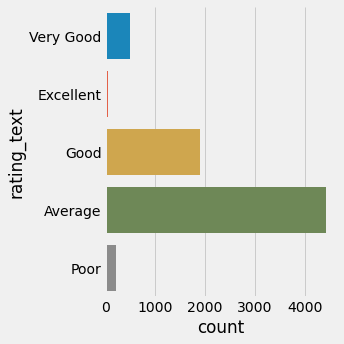

In [1220]:
# analysing rating_text distribution
sns.catplot(y="rating_text", kind="count", data=feature_eng)

In [1221]:
# replacing missing values for 'rating_text' for the maximum ocurred value on it
feature_eng['rating_text'].fillna(feature_eng['rating_text'].value_counts().idxmax(), inplace=True)

<AxesSubplot:xlabel='cost', ylabel='Count'>

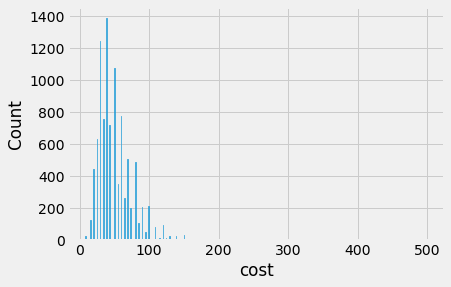

In [1222]:
# analysing cost histogram
sns.histplot(data=feature_eng, x='cost')

<AxesSubplot:xlabel='cost_2', ylabel='Count'>

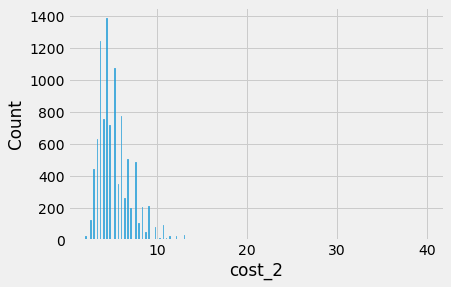

In [1223]:
# analysing cost_2 histogram
sns.histplot(data=feature_eng, x='cost_2')

In [1224]:
# imputing median for both cost and cost_2
feature_eng['cost'].fillna(feature_eng['cost'].median(), inplace=True)
feature_eng['cost_2'].fillna(feature_eng['cost_2'].median(), inplace=True)

In [1225]:
# for the 'type' missing values I'll eliminate the observations, since they account only for 0.47% of its observation
feature_eng = feature_eng.dropna(subset=['type'])

In [1226]:
# plotting boxplots for numerical variables
feature_eng_custom = feature_eng[['cost', 'cost_2', 'rating_number']]
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=feature_eng_custom, orient="h", palette="Set2")

#### Outliers

In [1227]:
# function to find aoutliers in the numerical variables
def find_outliers(df ,variable, factor= 3, print_summary=True):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    Lower_boundary = df[variable].quantile(0.25) - (IQR * factor)
    Upper_boundary = df[variable].quantile(0.75) + (IQR * factor)
    
    outliers= []
    for index, val in enumerate(df[variable]):
        if val < Lower_boundary or val > Upper_boundary:
            outliers.append(index)
    
    
    if(print_summary):
        print('{variable} outliers are values < {lowerboundary} or > {upperboundary}'.format(variable= variable, lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
    return Lower_boundary, Upper_boundary, outliers

In [1228]:
_,_,_ = find_outliers(feature_eng, 'cost')

cost outliers are values < -40.0 or > 135.0


In [1229]:
_,_,_ = find_outliers(feature_eng, 'cost_2')

cost_2 outliers are values < -1.7073170730000005 or > 11.80894309


In [1230]:
_,_,_ = find_outliers(feature_eng, 'rating_number')

rating_number outliers are values < 2.2000000000000006 or > 4.299999999999999


In [1231]:
# Replace the outliers with some predefined the maximum value for each variable
def max_value(df_temp, variable, top):
    return np.where(df_temp[variable]>top, top, df_temp[variable])

cols_with_outliers = {'cost': 135, 
                      'cost_2': 11.8, 
                      'rating_number': 4.3, 
                     }

In [1232]:
df_outliers_proc = feature_eng.copy()
for col in cols_with_outliers:
    df_outliers_proc[col] = max_value(df_outliers_proc, col, cols_with_outliers[col])

#### Declaring target and source variables

In [1233]:
X = df_outliers_proc.drop(['rating_number'], axis=1)
y = df_outliers_proc['rating_number']

#### Splitting data into training and testing data

In [1234]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8208, 8) (8208,)
(2052, 8) (2052,)


#### Encoding groupon, which is a binary variable

In [1235]:
# groupon is binary, we can use the BinaryEncoder to create a one-hot encoder for it
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['groupon'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

/Users/lucas/opt/anaconda3/envs/py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [1236]:
X_train.head()

cost                           cuisine rating_text      subzone  \
4053  25.0                ['Chinese', 'BBQ']     Average     Homebush   
6626  50.0        ['Cafe', 'Coffee and Tea']     Average     Oatlands   
5904  25.0                ['Cafe', 'Bakery']     Average   Turramurra   
3769  40.0                          ['Thai']   Very Good       Camden   
753   80.0  ['Spanish', 'Tapas', 'European']   Very Good  Bondi Beach   

                          type  votes  groupon_0  groupon_1    cost_2  
4053         ['Casual Dining']   17.0          0          1  3.313008  
6626                  ['Café']    0.0          0          1  5.243902  
5904                  ['Café']    4.0          0          1  3.313008  
3769         ['Casual Dining']  125.0          0          1  4.471545  
753   ['Bar', 'Casual Dining']  420.0          0          1  7.560976

### Linear Regression (model_1)

In [1237]:
X_train_lr = X_train[['cost', 'votes', 'groupon_0', 'groupon_1', 'cost_2']]
X_test_lr = X_test[['cost', 'votes', 'groupon_0', 'groupon_1', 'cost_2']] 

In [1238]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_lr, y_train)

LinearRegression()

In [1239]:
# predicting restaurant rating
y_pred = regressor.predict(X_test_lr)
y_pred

array([3.30465033, 3.20325971, 3.21156532, ..., 3.21726116, 3.22290304,
       3.2553655 ])

In [1240]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df

Actual  Predicted
2744   3.2000   3.304650
7755   2.8000   3.203260
9176   3.2855   3.211565
5144   3.6000   3.316930
3510   3.3000   3.281730
...       ...        ...
9365   3.2855   3.206620
10474  3.2855   3.194257
3904   3.1000   3.217261
4624   3.1000   3.222903
3956   3.2000   3.255365

[2052 rows x 2 columns]

In [1241]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.09774385964590274


In [1242]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2552539845652917

This model shows a very poor performance, with R2 = 0.25. It can be referred that 25% of the changeability of 'rating_number' output attribute, can be explained by the model.

### Linear Regression (model_2)
Using gradient descent as optimisation function

In [1243]:
# Creating a class for the linear regression with the Grad Descent as cost function
class GradientDescentLinearRegression:
    def __init__(self, learning_rate, iterations = 1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def fit(self, X, y, theta_0 = 0, theta_1 = 5):
        # start the parameters with initial values
        n = X.shape[0] # number of samples
        for _ in range(self.iterations):
            # compute gradients
            theta_0_gradient = -2 * np.sum(y - (theta_1 * X + theta_0)) / n
            theta_1_gradient = -2 * np.sum(X * (y - (theta_1 * X + theta_0))) / n
            
            # update
            theta_0 = theta_0 - (self.learning_rate * theta_0_gradient)
            theta_1 = theta_1 - (self.learning_rate * theta_1_gradient)
        
        self.theta_0 = theta_0
        self.theta_1 = theta_1
        
    def predict(self, X):
        return self.theta_1*X + self.theta_0

In [1244]:
X_train_grad = np.array(X_train_lr.cost)
X_test_grad = np.array(X_test_lr.cost)

In [1245]:
# train and fit a linear regression model to the data
learning_rate = 0.0001
linear_model = GradientDescentLinearRegression(learning_rate)
linear_model.fit(X_train_grad, y_train)

In [1246]:
# predicting on the dataset
predicted = linear_model.predict(X_test_grad)

Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

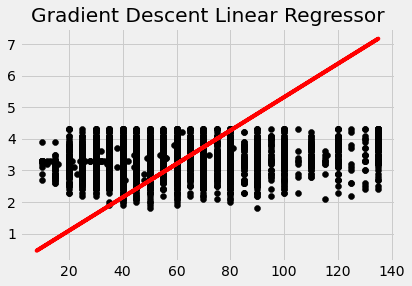

In [1247]:
# plotting the predicted data with the trained linear model
plt.style.use('fivethirtyeight')
plt.scatter(X_train_grad, y_train, color='black')
plt.plot(X_test_grad, predicted, color='red')
plt.gca().set_title('Gradient Descent Linear Regressor')

In [1248]:
# print model parameters: y = theta_1 * X + theta_0
print(linear_model.theta_0)
print(linear_model.theta_1)

0.03669875184650916
0.05282840235742787


In [1249]:
# calculating MSE for model_2
difference_arrays = np.subtract(predicted, y_test)
squared_array = np.square(difference_arrays)
mse = squared_array.mean()
print('Mean Squared Error:', mse)

Mean Squared Error: 1.8016551336093407


### Logistic Regression for classification task

#### Simplifying the problem into binary classification, where class1 = {'Poor', 'Average'} and class2 = {'Good', 'Very Good', 'Excellent'} 

In [1285]:
df_logistic = df_outliers_proc.copy()

#### Before proceding, we need to adjust the variables 'cuisine' and type, since they have multiple observations on them. If we don't adjust, it'll cause column dim(X_train, X_test) to be different from each another

In [1286]:
# copying original df_logistic
df_manip = df_logistic.copy()

In [1287]:
# converting the column which is a str into a list and reassigning to df_manip dataframe
str_list_cuisines = list()
for cuisine in df_manip['cuisine']:
    str_list_cuisines.append(cuisine.replace('[', '').replace(']', '').replace('\'', '').replace(', ', ',').split(','))
aux = pd.DataFrame({'cuisine_list': str_list_cuisines}, index=df_manip.index)
df_manip['cuisine'] = aux['cuisine_list']

In [1288]:
# doing the same process for variable type
str_list_type = list()
for type_rest in df_manip['type']:
    str_list_type.append(type_rest.replace('[', '').replace(']', '').replace('\'', '').replace(', ', ',').split(','))
aux = pd.DataFrame({'type_list': str_list_type}, index=df_manip.index)
df_manip['type'] = aux['type_list']

In [1289]:
# repeating the same process for variable subzone
str_list_subzone = list()
for subzone in df_manip['subzone']:
    str_list_subzone.append(subzone.replace('[', '').replace(']', '').replace('\'', '').replace(', ', ',').split(','))
aux = pd.DataFrame({'subzone_list': str_list_subzone}, index=df_manip.index)
df_manip['subzone'] = aux['subzone_list']

In [1290]:
# transforming into class1 and class2
df_manip.loc[df_manip['rating_text'] == 'Poor', 'rating_text'] = 'class1'
df_manip.loc[df_manip['rating_text'] == 'Average', 'rating_text'] = 'class1'
df_manip.loc[df_manip['rating_text'] == 'Good', 'rating_text'] = 'class2'
df_manip.loc[df_manip['rating_text'] == 'Very Good', 'rating_text'] = 'class2'
df_manip.loc[df_manip['rating_text'] == 'Excellent', 'rating_text'] = 'class2'

In [1291]:
# groupon is binary, we can use the BinaryEncoder to create a one-hot encoder for it
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['groupon'])

df_manip = encoder.fit_transform(df_manip)

/Users/lucas/opt/anaconda3/envs/py37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [1292]:
# finally 'exploding' the categorical variables, in order to prepare for 'get_dumies'
df_manip = df_manip.explode('cuisine')
df_manip = df_manip.explode('type')
df_manip = df_manip.explode('subzone')

In [1293]:
# get dummies for the categorical variables
df_manip = pd.concat([df_manip['cost'], df_manip['votes'], df_manip['cost_2'], 
                      df_manip['rating_number'], df_manip['groupon_0'], df_manip['rating_text'], df_manip['groupon_1'],
                      pd.get_dummies(df_manip.cuisine),
                      pd.get_dummies(df_manip.subzone),
                      pd.get_dummies(df_manip.type)], axis=1)


In [1294]:
df_manip = df_manip.reset_index()

#### Declaring source and target variables

In [1295]:
X = df_manip.drop(['rating_text'], axis=1)
y = df_manip['rating_text']

In [1296]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16500, 742) (16500,)
(4126, 742) (4126,)


### feature scaling or standardization

In [1297]:
# first keep the column name to get the DF back
cols = X_train.columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# get the DFs back
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head()

index      cost     votes    cost_2 rating_number groupon_0 groupon_1  \
0  0.328444  0.850394  0.014215  0.851170          0.68       0.0       1.0   
1  0.424271  0.291339  0.003399  0.291604          0.52       0.0       1.0   
2  0.179558  0.251969  0.048826  0.252198          0.76       0.0       1.0   
3  0.474471  0.645669  0.002781  0.646259          0.52       0.0       1.0   
4  0.605830  0.409449  0.004017  0.409822          0.36       0.0       1.0   

  Afghani African American  ... Casual Dining Club Dessert Parlour Fast Food  \
0     0.0     0.0      0.0  ...           1.0  0.0             0.0       0.0   
1     0.0     0.0      0.0  ...           0.0  0.0             0.0       0.0   
2     0.0     0.0      0.0  ...           1.0  0.0             0.0       0.0   
3     0.0     0.0      0.0  ...           0.0  0.0             0.0       0.0   
4     0.0     0.0      0.0  ...           0.0  0.0             0.0       0.0   

  Fine Dining Food Court Food Stall Food Truck  Pub Wine Bar  
0         0.0        0.0        0.0        0.0  0.0      0.0  
1         0.0        0.0        0.0        0.0  0.0      0.0  
2         0.0        0.0        0.0        0.0  0.0      0.0  
3         0.0        0.0        0.0        0.0  0.0      0.0  
4         0.0        0.0        0.0        0.0  0.0      0.0  

[5 rows x 742 columns]

#### Training model using Log Regression

In [1298]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

#### Predicting Results

In [1299]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['class2', 'class1', 'class1', ..., 'class1', 'class2', 'class1'],
      dtype=object)

#### Checking accuracy

In [1300]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9867


#### Confusion matrix

In [1301]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3034   15]
 [  40 1037]]

True Positives(TP) =  3034

True Negatives(TN) =  1037

False Positives(FP) =  15

False Negatives(FN) =  40


In [1302]:
# True Positives (Actual Positive:1 and Predict Positive:1) - 20892
# True Negatives (Actual Negative:0 and Predict Negative:0) - 3285
# False Positives (Actual Negative:0 but Predict Positive:1) - 1175 (Type I error)
# False Negatives (Actual Positive:1 but Predict Negative:0) - 3087 (Type II error)

<AxesSubplot:>

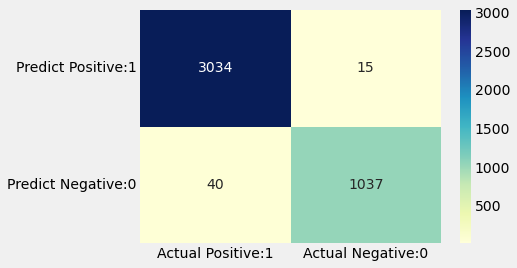

In [1303]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [1304]:
cm_normalised = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm_normalised, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

<AxesSubplot:>

The logistic regression model seems to predict pretty accurately in this proposed simplified scenario.

### KNN model

In [1364]:
# retrieving X and y
X_knn = X[['cost', 'rating_number']]
X_knn

cost  rating_number
0      50.0         4.0000
1      50.0         4.0000
2      50.0         4.0000
3      50.0         4.0000
4      80.0         4.3000
...     ...            ...
20621  35.0         3.2855
20622  40.0         3.2855
20623  20.0         3.2855
20624  20.0         3.2855
20625  15.0         3.2855

[20626 rows x 2 columns]

In [1365]:
y_knn = y.copy()

In [1366]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=0)

In [1367]:
# performing feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1368]:
# training and predicting
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [1369]:
y_pred = classifier.predict(X_test)

In [1370]:
# evaluating
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3049    0]
 [   0 1077]]
              precision    recall  f1-score   support

      class1       1.00      1.00      1.00      3049
      class2       1.00      1.00      1.00      1077

    accuracy                           1.00      4126
   macro avg       1.00      1.00      1.00      4126
weighted avg       1.00      1.00      1.00      4126



For the simplified case, the KNN model predicted with 100% accuracy, which is impressive.